# ERCOT Generation Insights
All of the charts below are base upon publicly available data downloaded from ERCOT:
https://www.ercot.com/gridinfo/generation/

ERCOT does not separate sources into base vs peaker plants, so I just picked something.
Opinionated fuel mappings are below.

In [1]:
import pandas as pd

In [2]:
from ercot_data import get_ercot_data

newdf = get_ercot_data()

/Users/jimmy.wan/.pyenv/versions/miniconda3-latest/envs/jupyter/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [3]:
import altair as alt
alt.data_transformers.disable_max_rows()
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [4]:
date_range=f'{newdf.Date.min().strftime("%Y-%m")}-{newdf.Date.max().strftime("%Y-%m")}'
height=1080/2

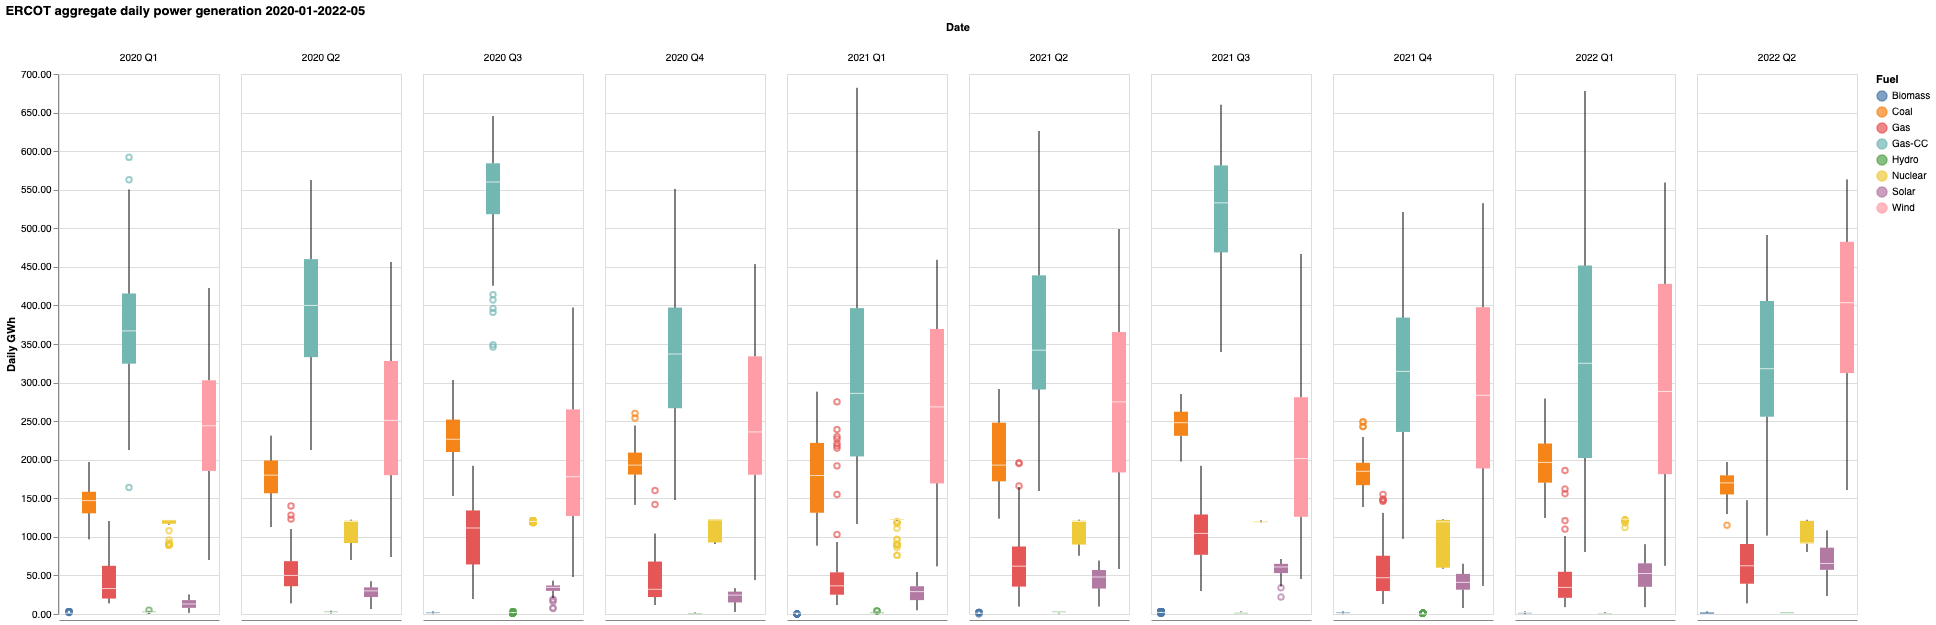

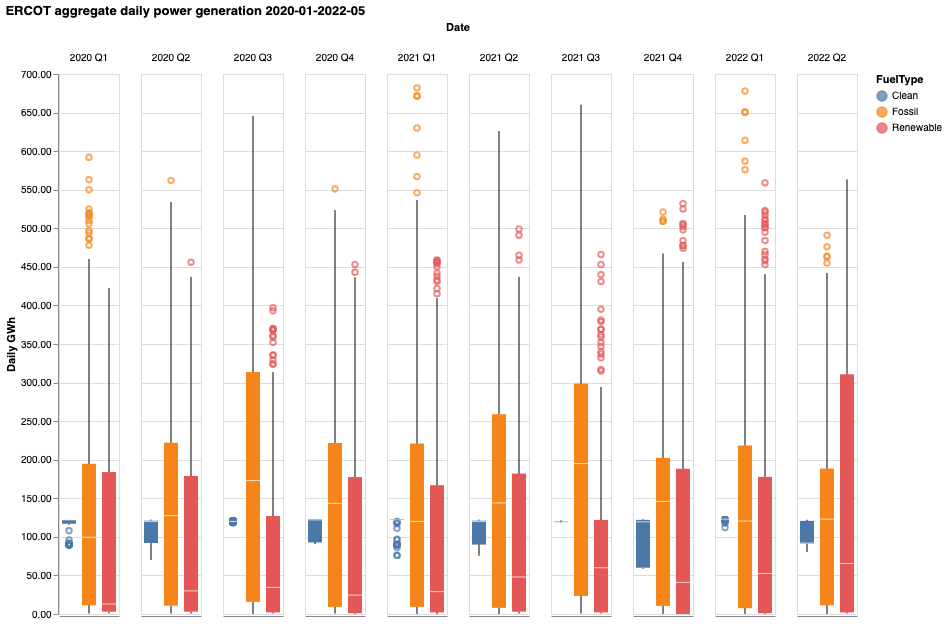

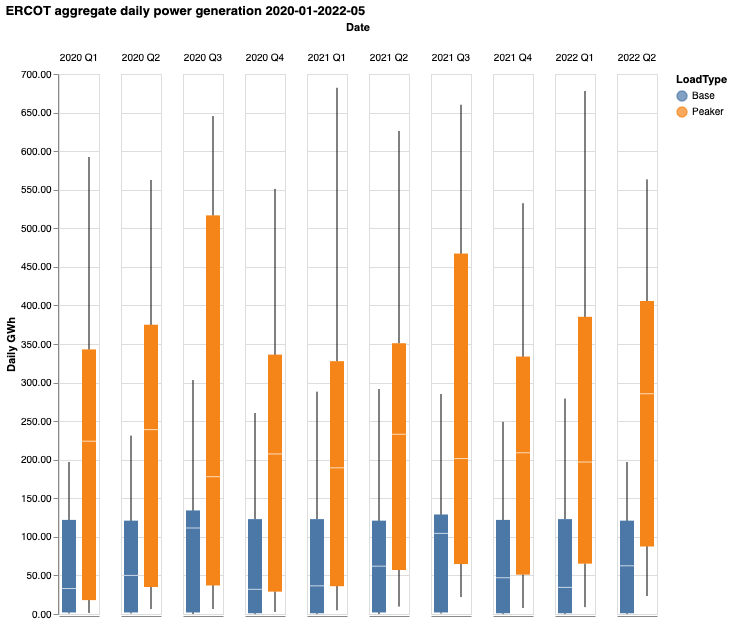

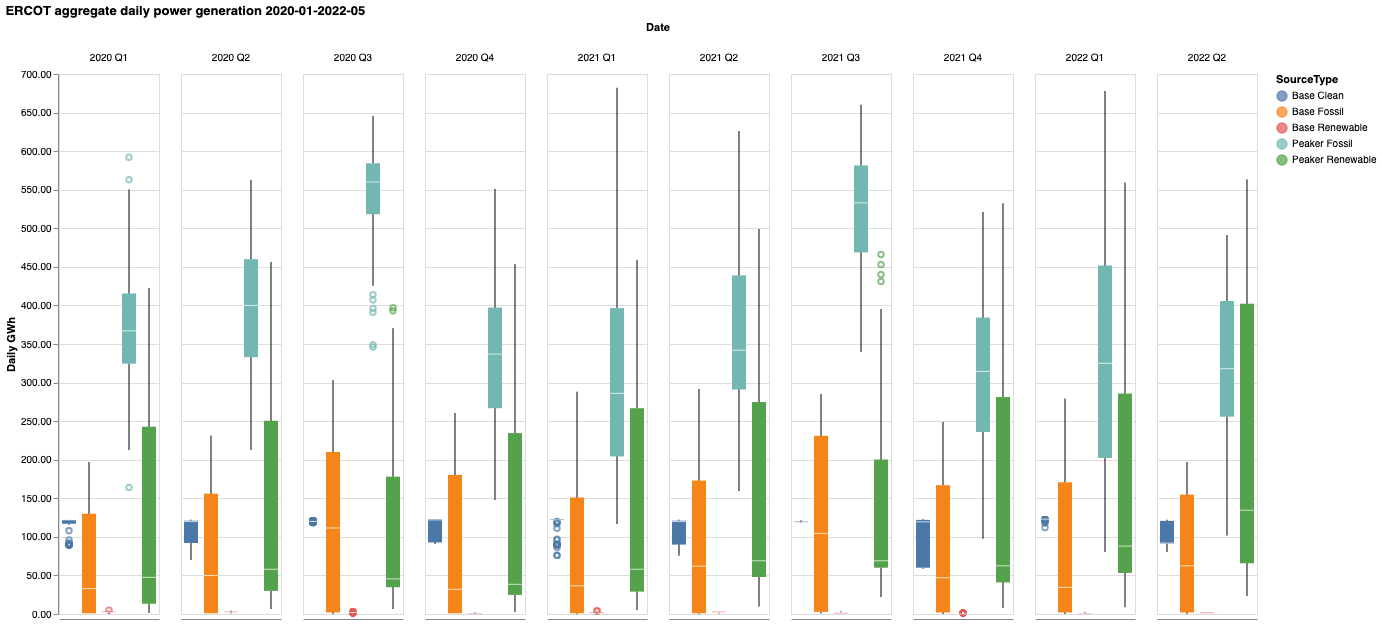

In [5]:
daily_df = newdf.query('Fuel not in ("ALL SOURCES", "Other")')
for facet in ('Fuel','FuelType', 'LoadType', 'SourceType'):
    chart = alt.Chart(
        daily_df
    ).mark_boxplot(
    ).encode(
        x=alt.X(f'{facet}:N', axis=alt.Axis(labels=False, ticks=False), title=None),
        column=alt.Column('yearquarter(Date):T', title='Date'),
        y=alt.Y(
            'Total:Q', title='Daily GWh',
            scale=alt.Scale(domainMin=0), axis=alt.Axis(format='0.2f'),
        ),
        color=f'{facet}:N',
        tooltip=[
            f'{facet}',
            'Date',
            alt.Tooltip('Total', format='d'), 
            alt.Tooltip('pct', format='.2%'), 
        ]
    ).properties(
        title=f'ERCOT aggregate daily power generation {date_range}',
        # width=width,
        height=height,
    )
    display(chart)